# IMPORT MODULES

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# READING DATAFRAME

In [66]:
df = pd.read_csv("wine_fraud.csv")

In [67]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   object 
 12  type                  6497 non-null   object 
dtypes: float64(11), object(2)
memory usage: 660.0+ KB


In [69]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


In [70]:
df['quality'].unique() # --> types of quality of wine

array(['Legit', 'Fraud'], dtype=object)

In [71]:
df['quality'].value_counts()

Legit    6251
Fraud     246
Name: quality, dtype: int64

# DATA VISUALISATION

<b> Let's visualise the count per category of Legit Vs Fraud to see whether label is unbalanced or not?</b>

<AxesSubplot:xlabel='quality', ylabel='count'>

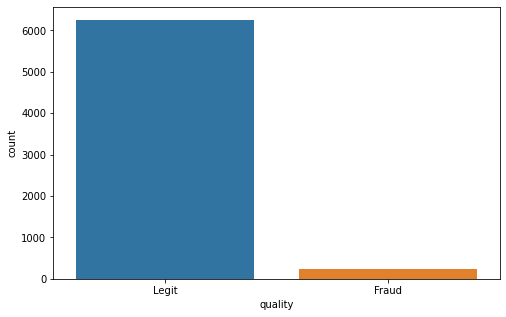

In [72]:
plt.figure(figsize=(8,5))
sns.countplot(x='quality', data=df)

In [73]:
# Checking for null values in the DataFrame.
np.sum(df.isnull())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

In [74]:
df['type'].unique()

array(['red', 'white'], dtype=object)

<b>Let us see count per category of Legit Vs Fraud for different wine types. We can see if there is difference between red and white wine when it comes to Fraud.</b>

<AxesSubplot:xlabel='quality', ylabel='count'>

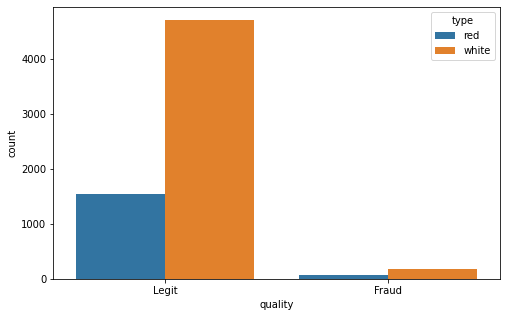

In [75]:
plt.figure(figsize=(8,5))
sns.countplot(x='quality', data=df, hue='type')

<b>Calcualting percentage of red wines are Fraud and percentage of white wines are Fraud.</b>

In [76]:
no_of_fraud_red_wines = len(df[(df['type']=='red')&(df['quality']=='Fraud')])
no_of_red_wines = len(df[df['type']=='red'])

In [77]:
no_of_fraud_white_wines = len(df[(df['type']=='white')&(df['quality']=='Fraud')])
no_of_white_wines = len(df[df['type']=='white'])

In [78]:
no_of_fraud_red_wines/no_of_red_wines * 100 # --> Percentage of red wines which are Fraud

3.9399624765478425

In [79]:
no_of_fraud_white_wines/no_of_white_wines * 100 # --> Percentage of white wines which are Fraud

3.7362188648427925

<b> We can tell that there is not much difference in percentage of Fraud wines due to "type" of wine.</b>

<b> Let's see the correlation of other features with the "quality" column. In order to do that I need to map the values of Fraud and Legit as some numeric value since other features are continous columns.</b>

In [80]:
df['quality'] = df['quality'].map({'Fraud':1, 'Legit':0}) # --> Fraud and Legit will be mapped with 1 and 0 respectively.

<b> Below are different correlation values of different features with quality label in ascending order.</b>

In [81]:
df.corr()['quality'].sort_values() 

free sulfur dioxide    -0.085204
citric acid            -0.061789
alcohol                -0.051141
residual sugar         -0.048756
total sulfur dioxide   -0.035252
sulphates              -0.034046
density                 0.016351
pH                      0.020107
fixed acidity           0.021794
chlorides               0.034499
volatile acidity        0.151228
quality                 1.000000
Name: quality, dtype: float64

<b> Visualisation of correlation on the bar plot </b>

In [82]:
ser = df.corr()['quality'].sort_values()
ser = ser.drop('quality', axis=0)

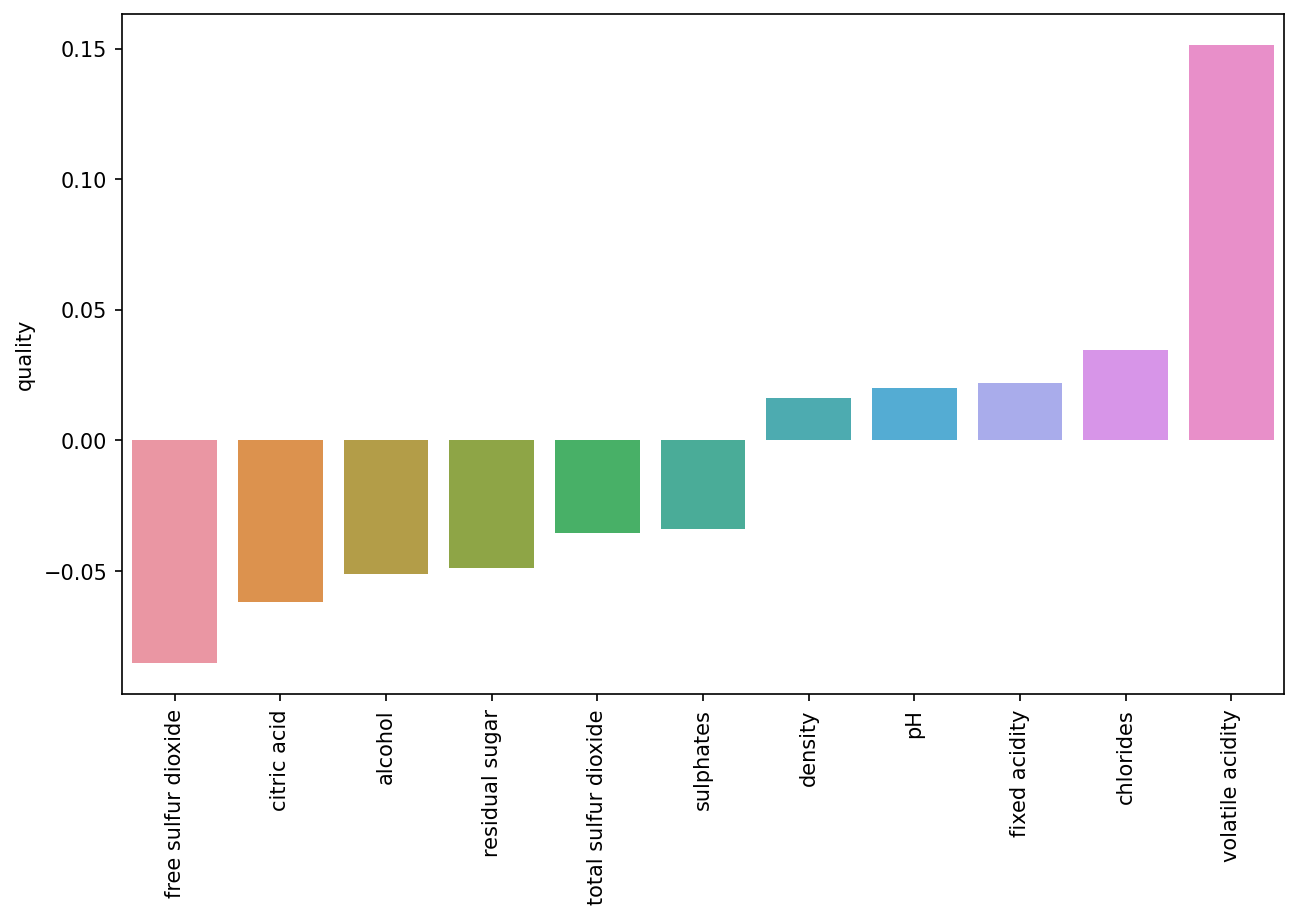

In [83]:
plt.figure(figsize=(10,6),dpi=150)
sns.barplot(x=ser.index, y=ser)
plt.xticks(rotation=90);

<b> Cluster map to explore the relationship between variables</b>

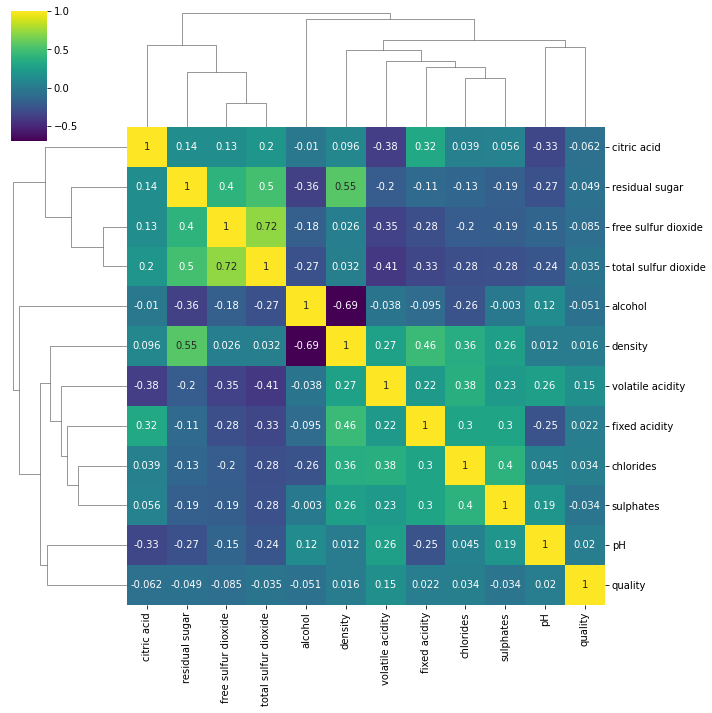

In [84]:
sns.clustermap(data=df.corr(), cmap='viridis', annot=True)

# MACHINE LEARNING MODEL

In [85]:
df['type'] = pd.get_dummies(df['type'], drop_first=True)

In [86]:
X = df.drop('quality', axis=1)
y = df['quality']

<b> Perform Train-Test Split</b>

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

<b> Scaling the Data </b>

In [89]:
from sklearn.preprocessing import StandardScaler

In [90]:
scaler = StandardScaler()

In [91]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<b> Function to show the best Hyper Parameters of model </b>

In [93]:
from sklearn.model_selection import GridSearchCV

In [107]:
def BestParams(model, param_grid, X_train, y_train):
    grid_model=GridSearchCV(model,param_grid)
    grid_model.fit(X_train, y_train)
    print(grid_model.best_params_)

<b> Function to evaluate the performance of a model </b>

In [116]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay , classification_report

In [148]:
def Performance(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_preds = model.predict(X_test)
    print("Accuracy score is", accuracy_score(y_test, y_preds))
    
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
    
    print(classification_report(y_test, y_preds, labels=np.unique(y_preds)))

<b> K Nearest Neighbours </b>

In [99]:
from sklearn.neighbors import KNeighborsClassifier

In [105]:
knn_model = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1,31,1)}

In [108]:
BestParams(knn_model, param_grid, X_train, y_train)

{'n_neighbors': 2}


Accuracy score is 0.9656410256410256
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1886
           1       0.36      0.06      0.11        64

    accuracy                           0.97      1950
   macro avg       0.67      0.53      0.54      1950
weighted avg       0.95      0.97      0.95      1950



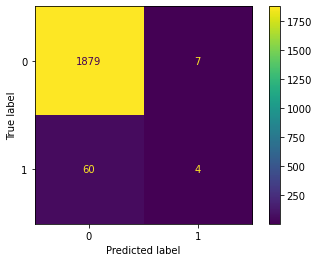

In [120]:
knn_model = KNeighborsClassifier(n_neighbors = 2)
Performance(knn_model, X_train, y_train, X_test, y_test)

<b> LOGISTIC REGRESSION </b>

In [122]:
from sklearn.linear_model import LogisticRegression

In [129]:
log_model = LogisticRegression(solver='saga', multi_class='ovr', max_iter=5000)

In [124]:
param_grid = {'penalty':['l1','l2'], 'C':np.logspace(0,4,10)}

In [130]:
BestParams(log_model, param_grid, X_train, y_train)

{'C': 1.0, 'penalty': 'l2'}


In [132]:
log_model = LogisticRegression(solver='saga', multi_class='ovr', max_iter=5000, penalty='l2', C=1)

Accuracy score is 0.9682051282051282
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1886
           1       1.00      0.03      0.06        64

    accuracy                           0.97      1950
   macro avg       0.98      0.52      0.52      1950
weighted avg       0.97      0.97      0.95      1950



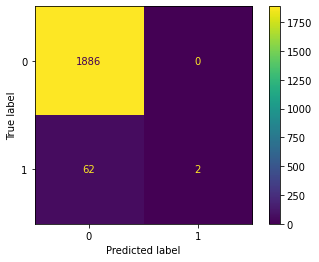

In [133]:
Performance(log_model, X_train, y_train, X_test, y_test)

<b> SUPPORT VECTOR CLASSIFIER </b>

In [134]:
from sklearn.svm import SVC

In [140]:
svc_model = SVC(class_weight='balanced')

In [141]:
param_grid={'C':[0.01,0.1,1], 'kernel':['linear','rbf'], 'gamma':['scale','auto']}

In [142]:
BestParams(svc_model, param_grid, X_train, y_train)

{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


In [143]:
svc_model = SVC(C=1, kernel='rbf', gamma='scale')

Accuracy score is 0.9671794871794872
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1886

   micro avg       0.97      1.00      0.98      1886
   macro avg       0.97      1.00      0.98      1886
weighted avg       0.97      1.00      0.98      1886



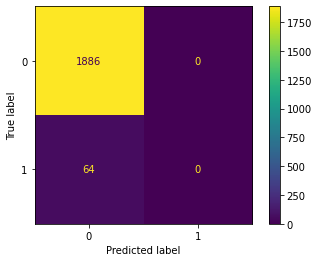

In [149]:
Performance(svc_model, X_train, y_train, X_test, y_test)

</b> Since Support Vector Classifier gives us high accuarcy as well as high Precision and Recall score It is the best choice for for the model </b>

<b> SAVING MODEL </b>

In [151]:
final_model = svc_model = SVC(C=1, kernel='rbf', gamma='scale')

In [152]:
from joblib import dump, load
dump(final_model, 'wine_quality.joblib')

['wine_quality.joblib']